<a href="https://colab.research.google.com/github/Ashkan1377/bitcoin_Task-/blob/main/BitCoin_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
from scipy import stats
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [20]:
my_pandas_file = pd.read_excel('/content/gdrive/My Drive/BTC.xlsx')
y_data = my_pandas_file.get('mean')
y_data

0        7298.5025
1        7363.5200
2        7365.5975
3        7322.9950
4        7306.2575
           ...    
8995    62049.8850
8996    62092.6850
8997    62257.4600
8998    62012.4200
8999    61648.9850
Name: mean, Length: 9000, dtype: float64

In [21]:
x_data = np.arange(0,len(y_data), 1)
x_data_composed = x_data.reshape(-1,1)

In [22]:
#x_data = my_pandas_file.drop('mean', axis=1)

In [23]:
correlation = pearsonr(x_data, y_data)
correlation

(0.8759949327183532, 0.0)

In [24]:
lin_regression = LinearRegression().fit(x_data_composed, y_data)
model_line = lin_regression.predict(x_data_composed)

In [25]:
# ridge = Ridge().fit(x_data_composed, y_data)
# model_line = ridge.predict(x_data_composed)

In [26]:
# lasso = Lasso().fit(x_data_composed, y_data)
# model_line = lasso.predict(x_data_composed)

In [27]:
# SV_regression = SVR(kernel='poly', degree=3).fit(x_data_composed, y_data)
# model_line = SV_regression.predict(x_data_composed)
# print(model_line)
# print(y_data)

(0.0, 80000.0)

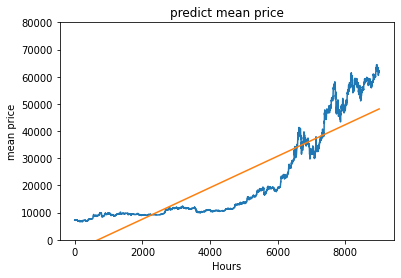

In [28]:
plt.plot(y_data)
plt.plot(model_line)
plt.xlabel('Hours')
plt.ylabel('mean price')
plt.title('predict mean price')
plt.ylim(0,80000)

In [29]:
def get_prediction_interval(prediction, y_test, test_predictions, pi=.95):

  '''
Get a prediction interval for a linear regression.
INPUTS:
- Single prediction,
- y_test
- All test set predictions,
- Prediction interval threshold (default = .95)
OUTPUT:
- Prediction interval for single prediction
'''
#get standard deviation of y_test
  
  sum_errs = np.sum((y_test - test_predictions)**2)
  stdev = np.sqrt(1 / (len(y_test) - 2) * sum_errs)

  #get interval from standard deviation

  one_minus_pi = 1 - pi
  ppf_lookup = 1 - (one_minus_pi / 2)

  z_score = stats.norm.ppf(ppf_lookup)

  interval =  stdev * z_score

  #generate prediction interval lower and upper bound x_data.composed

  lower, upper = prediction - interval, prediction + interval

  return lower, prediction, upper


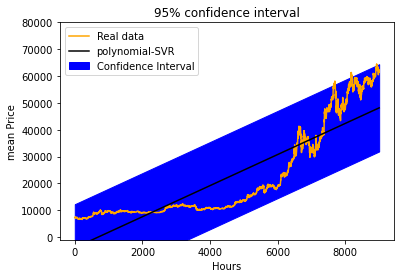

In [30]:
## Plot and save confidence interval of linear regression  - 95% x_data.composed

lower_vet = []
upper_vet = []

for i in model_line:
  lower, prediction, upper =  get_prediction_interval(i, y_data, model_line)
  lower_vet.append(lower)
  upper_vet.append(upper)

plt.fill_between(np.arange(0,len(y_data),1),upper_vet, lower_vet, color='b',label='Confidence Interval')

plt.plot(np.arange(0,len(y_data),1),y_data,color='orange',label='Real data')

plt.plot(model_line,'k',label='polynomial-SVR')

plt.xlabel('Hours')
plt.ylabel('mean Price')

plt.title('95% confidence interval')

plt.legend()
plt.ylim(-1000,80000)
plt.show()